In [30]:
import ast 
import pandas as pd 
import matplotlib.pyplot as plt 

data = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\Projects\Luke Barousse Projects\Python Course  Data Analysis\data_jobs.csv")
df=data
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


In [31]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [32]:
df_DA.head(1)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Data Analyst,Data Analytics,"Monterrey, Nuevo Leon, Mexico",via BeBee,Part-time,False,Mexico,2023-12-05 07:26:05,False,False,Mexico,NaN,NaN,NaN,2U Bootcamps Instructional Engagement,"[go, python, mongodb, mongodb, css, javascript...","{'analyst_tools': ['tableau'], 'databases': ['..."


In [33]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

In [9]:
df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
0,Data Analyst,Data Analytics,"Monterrey, Nuevo Leon, Mexico",via BeBee,Part-time,False,Mexico,2023-12-05 07:26:05,False,False,Mexico,NaN,NaN,NaN,2U Bootcamps Instructional Engagement,"[go, python, mongodb, mongodb, css, javascript...","{'analyst_tools': ['tableau'], 'databases': ['...",12
2,Data Analyst,"Manager, Data Analytics","Guanacaste Province, Lagunilla, Costa Rica",via BeBee Costa Rica,Full-time,False,Costa Rica,2023-11-21 08:37:14,False,False,Costa Rica,NaN,NaN,NaN,Thermo Fisher Scientific,NaN,NaN,11
4,Data Analyst,Technical Data Analyst,"Fairfax, VA",via Indeed,Contractor,False,"New York, United States",2023-12-20 07:00:10,True,False,United States,NaN,NaN,NaN,Info Origin Inc.,"[sql, python, jira]","{'async': ['jira'], 'programming': ['sql', 'py...",12
19,Data Analyst,Data analyst,"Oakland, CA",via BeBee,Full-time,False,"California, United States",2023-03-27 07:02:06,False,False,United States,NaN,NaN,NaN,Ellianse LLC,[jira],{'async': ['jira']},3
26,Data Analyst,Sr. Data Analyst - Full-time / Part-time,"Jacksonville, FL",via Snagajob,Full-time,False,Georgia,2023-02-05 08:27:09,True,False,United States,NaN,NaN,NaN,Robert Half,"[sql, power bi, dax]","{'analyst_tools': ['power bi', 'dax'], 'progra...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787629,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}",3
787634,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,NaN,NaN,NaN,Amul,NaN,NaN,3
787645,Data Analyst,Data Analyst (m/w/d),"Jena, Jerman",melalui XING,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,linimed Gruppe,"[sql, julia, power bi, dax]","{'analyst_tools': ['power bi', 'dax'], 'progra...",3
787659,Data Analyst,Data Research Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,NaN,NaN,NaN,Zap Recruit,NaN,NaN,3


In [34]:
df_DA_exlpode = df_DA.explode('job_skills')


In [35]:
df_DA_pivot=df_DA_exlpode.pivot_table(index='job_posted_month_no',columns='job_skills' , aggfunc='size',fill_value=0)

<Axes: xlabel='job_posted_month_no'>

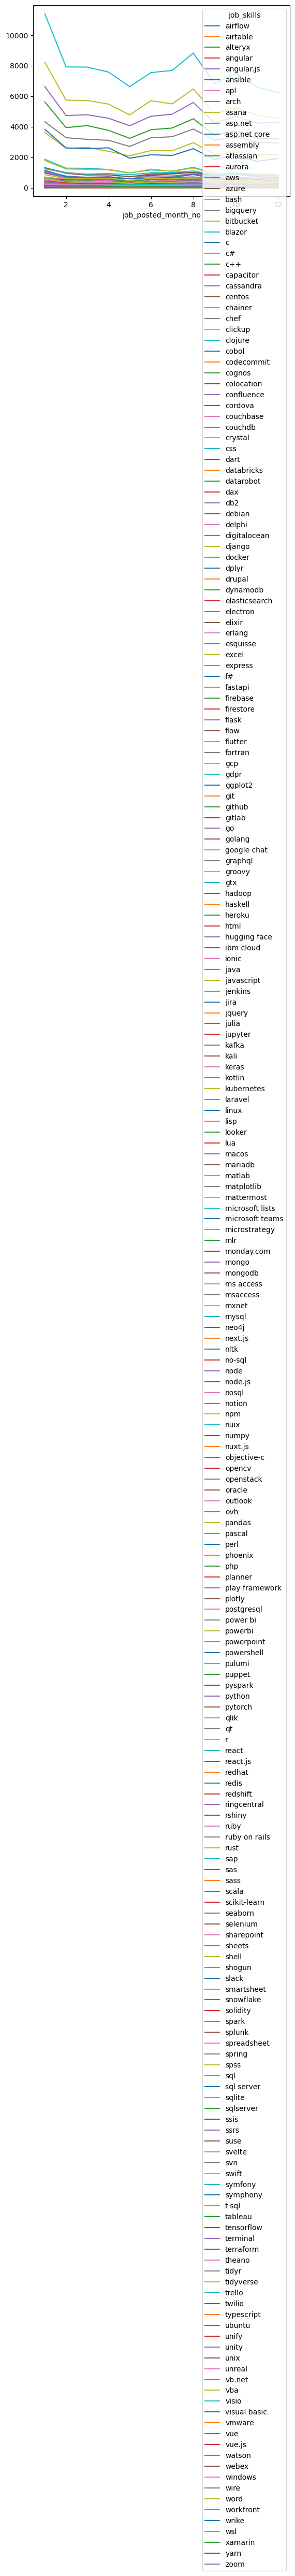

In [36]:
df_DA_pivot.plot(kind='line')

In [37]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc["Total"].sort_values(ascending = False).index]
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11398,8221,6630,5623,4332,3631,3838,1868,1782,1247,...,0,0,0,0,0,1,1,0,0,0
2,7919,5741,4734,3943,3282,2581,2614,1286,1236,973,...,0,0,0,0,0,0,0,0,0,0
3,7907,5722,4785,4074,3175,2651,2570,1279,1212,894,...,1,0,0,0,0,0,0,0,0,1
4,7582,5487,4557,3766,3113,2392,2618,1202,1177,935,...,0,0,0,0,0,0,0,0,1,0
5,6627,4778,4068,3242,2708,2095,1940,976,960,853,...,0,0,0,0,0,0,0,1,0,0
6,7546,5707,4685,3805,3280,2442,2164,1175,1225,979,...,0,0,0,0,0,0,0,0,0,0
7,7687,5499,4824,3917,3347,2424,2120,1087,1080,1003,...,0,0,1,0,0,0,0,0,0,0
8,8829,6471,5589,4521,3849,2958,2566,1341,1294,1108,...,0,0,0,0,0,0,0,0,0,0
9,6829,4880,4242,3450,3129,2187,1854,940,934,848,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot


job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11398,8221,6630,5623,4332,3631,3838,1868,1782,1247,...,0,0,0,0,0,1,1,0,0,0
2,7919,5741,4734,3943,3282,2581,2614,1286,1236,973,...,0,0,0,0,0,0,0,0,0,0
3,7907,5722,4785,4074,3175,2651,2570,1279,1212,894,...,1,0,0,0,0,0,0,0,0,1
4,7582,5487,4557,3766,3113,2392,2618,1202,1177,935,...,0,0,0,0,0,0,0,0,1,0
5,6627,4778,4068,3242,2708,2095,1940,976,960,853,...,0,0,0,0,0,0,0,1,0,0
6,7546,5707,4685,3805,3280,2442,2164,1175,1225,979,...,0,0,0,0,0,0,0,0,0,0
7,7687,5499,4824,3917,3347,2424,2120,1087,1080,1003,...,0,0,1,0,0,0,0,0,0,0
8,8829,6471,5589,4521,3849,2958,2566,1341,1294,1108,...,0,0,0,0,0,0,0,0,0,0
9,6829,4880,4242,3450,3129,2187,1854,940,934,848,...,0,0,0,0,0,0,0,0,0,0


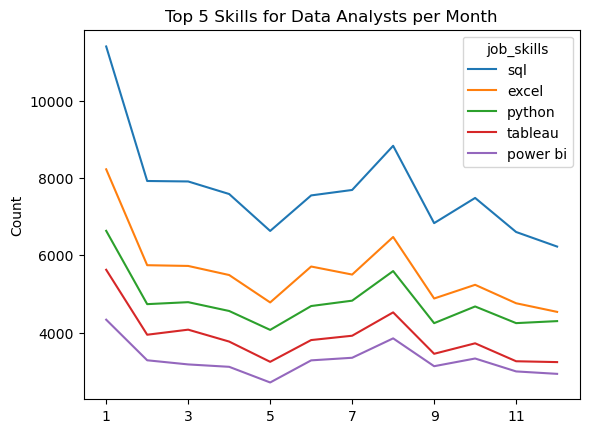

In [39]:
df_DA_pivot.iloc[:,0:5].plot(kind='line')
plt.title("Top 5 Skills for Data Analysts per Month")
plt.xlabel("")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='job_posted_month'>

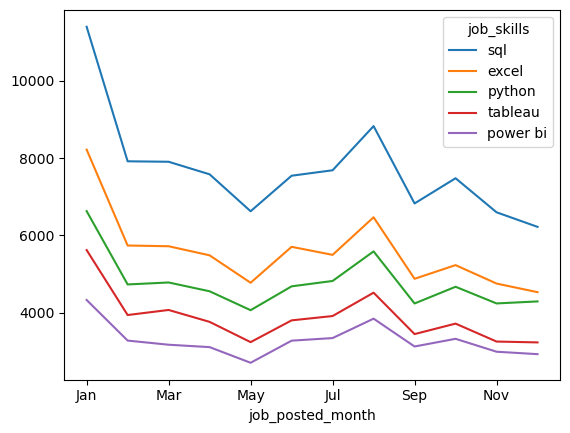

In [40]:
df_DA_pivot =df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x,format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot =df_DA_pivot.drop(columns='job_posted_month_no')

df_DA_pivot.iloc[:,:5].plot(kind='line')


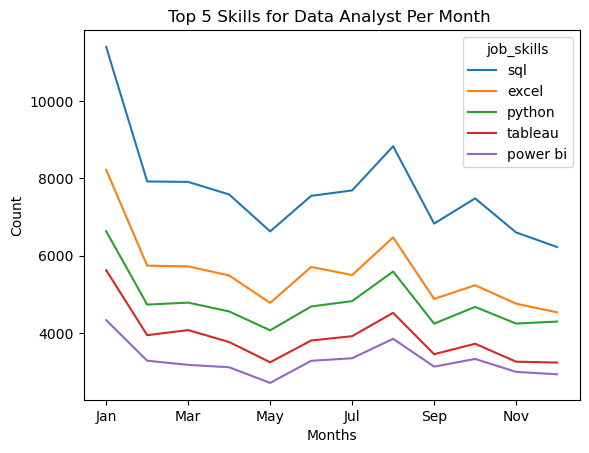

In [43]:
df_DA_pivot.iloc[:,:5].plot(kind='line')
plt.title("Top 5 Skills for Data Analyst Per Month ")
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()